In [336]:
!pip install opencv-python
!pip install matplotlib

Reshimming asdf python...
Reshimming asdf python...


In [337]:
# Import opencv
import cv2 
# Import matplotlib
import matplotlib.pyplot as plt

In [338]:
config_file = 'arquivo_de_configuracao.pbtxt'
frozen_model = 'frozen_model.pb'

In [339]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [340]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fc211e62370>

In [341]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [342]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', '', 'backpack', 'umbrella', '', '', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', '', 'diningtable', '', '', 'toilet', '', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', '', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# 3. Identificando em imagem 

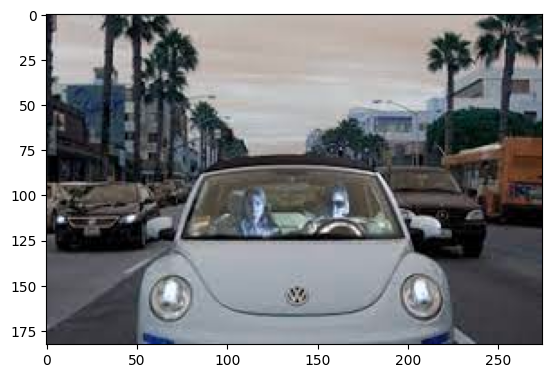

In [423]:
img = cv2.imread('carro2.jfif') # Opencv lendo a imagem
plt.imshow(img) # imagem em BGR

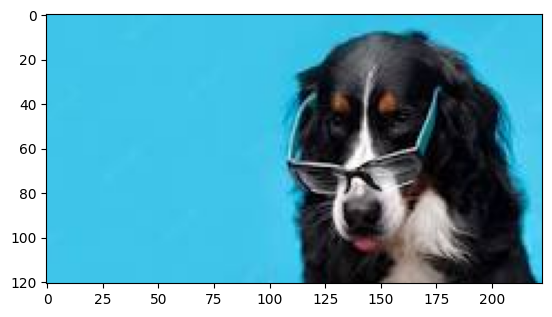

In [362]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Imagem normal

In [426]:
ClassIndex, confidece, bbox =model.detect(img,confThreshold = 0.1)

In [427]:
print(ClassIndex)
print(confidece)

[ 3  1  3  1  3  8  6  8  3  3  3  1  3  1  1  3  3  1  3  8 10  3  1  3
  6  3  1  8  8  1 18 10 10  1  1  1  3  8  1  8  7  3 10  3  3  1  3  3
 10 10 10  3 10  3  3  3  3  3  3  6  1  1 18  1  8 10  1  1  1 10 10  4
  1  1 60  1  8 10  9  1  8  1 10  1  1 18  8  1  1 10 10  1 10 10  1  1
 10  1  1 10]
[0.71232396 0.67607045 0.6590393  0.64947045 0.6219137  0.510114
 0.50563115 0.47845948 0.46413383 0.46127537 0.4447197  0.41428596
 0.4027997  0.38111264 0.37573418 0.36380157 0.3467503  0.34188476
 0.31543586 0.31046683 0.30823454 0.30528706 0.29605916 0.2881192
 0.26867926 0.26855963 0.26796928 0.2602328  0.25981945 0.2581554
 0.25780705 0.24886394 0.24578343 0.2442232  0.23929402 0.23736209
 0.23729129 0.23593153 0.23267202 0.22826062 0.22015712 0.21492974
 0.2132114  0.20955205 0.20876756 0.20806675 0.20768023 0.2045614
 0.20427935 0.20427877 0.19989927 0.19863822 0.19738868 0.19558603
 0.19140457 0.19122192 0.19101702 0.1902673  0.18675768 0.18339255
 0.17608534 0.17308037 0.1683

In [428]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = 1,color=(0,255,0), thickness =1)

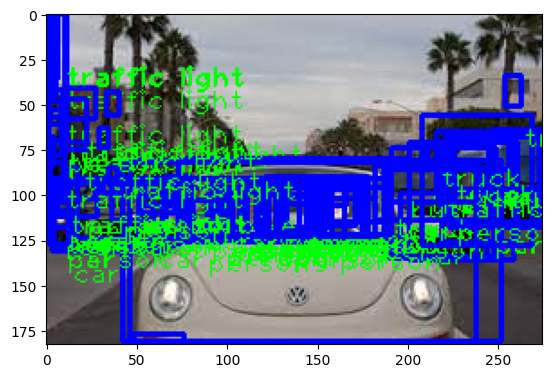

In [429]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
